In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import math
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
def string_to_numerical(input_col):#i associate a unique number to each string
    non_num=input_col
    #print(HomePlanet)
    out_col=[]
    element_list=[]
    for element in non_num:
        if element in element_list:
            out_col.append(element_list.index(element))
        else:
            element_list.append(element)
            out_col.append(len(element_list)-1)
    return out_col
def eliminate_nan_string(column,tosub):
    new_col=[]#substitute tosub in every nan occurence, let other invariant
    for x in column:
        if type(x)==type("a"):
            new_col.append(x)
        else:
            new_col.append(tosub)
    return new_col
def eliminate_nan_cat(column):#i substitute every nan occurrence with the number n
    new_col=[]#also convert a bool to numerical
    M=np.max(column)
    for x in column:
        if math.isnan(x):
            new_col.append(M+1)
        else:
            new_col.append(int(x))
    return new_col
def eliminate_nan_num(column):#i substitute each nan occurence with the average
    column_zeroed=np.nan_to_num(column, copy=True, nan=0.0, posinf=None, neginf=None)
    mean=np.mean(column_zeroed)
    #std=np.std(column_zeroed)
    return np.nan_to_num(column, copy=True, nan=mean, posinf=None, neginf=None)
def normalize(column):
    column_normalized=(column-np.mean(column))/np.std(column)
    return column_normalized

In [3]:
import keras
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
print(train.head())
train_2=pd.DataFrame()
test_2=pd.DataFrame()
#train_2[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]=train[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
#print(train_2.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [4]:
#gestisci passenger ID. ho informazioni sia nel gruppo che nella posizione all'interno del sottogruppo
column=[]
column_2=[]
for Id in train["PassengerId"]:
    Id_1,Id_2=Id.split("_")
    column.append(int(Id_1))
    column_2.append(int(Id_2))
#print(column[:10],column_2[:10])
train_2["Id_1"]=normalize(eliminate_nan_num(column))
train_2["Id_2"]=eliminate_nan_num(column_2)

In [5]:
#print(type(train["Cabin"][0]),type(Nan))

In [6]:
#gestisci cabin ID
column=[[],[],[]]
names=["deck","num","side"]
col=eliminate_nan_string(train["Cabin"],"0/0/0")
for cabin in col:
    #print(cabin)
    Id_1,Id_2, Id_3 =cabin.split("/")
    column[0].append(Id_1)
    column[1].append(Id_2)
    column[2].append(Id_3)
for l,c in zip(names,column):
    train_2[l]=eliminate_nan_cat(string_to_numerical(c))
train_2["num"]=normalize(train_2["num"])

In [7]:
import math
train_2["HomePlanet"]=eliminate_nan_cat(string_to_numerical(train["HomePlanet"]))
train_2["Destination"]=eliminate_nan_cat(string_to_numerical(train["Destination"]))
#train_2["Cabin"]=eliminate_nan_cat(string_to_numerical(train["Cabin"]))
train_2["CryoSleep"]=eliminate_nan_cat(train["CryoSleep"])
train_2["VIP"]=eliminate_nan_cat(train["VIP"])
train_2["Age"]=normalize(eliminate_nan_num(train["Age"]))
train_2["VRDeck"]=normalize(eliminate_nan_num(train["VRDeck"]))
train_2["Spa"]=normalize(eliminate_nan_num(train["Spa"]))
train_2["ShoppingMall"]=normalize(eliminate_nan_num(train["ShoppingMall"]))
train_2["FoodCourt"]=normalize(eliminate_nan_num(train["FoodCourt"]))
train_2["RoomService"]=normalize(eliminate_nan_num(train["RoomService"]))
test_2["Transported"]=train["Transported"].astype(int)

In [8]:
print(train_2.head())
print(train.head())

       Id_1  Id_2  deck       num  side  HomePlanet  Destination  CryoSleep  \
0 -1.734409     1     0 -1.147618     0           0            0          0   
1 -1.734034     1     1 -1.147618     1           1            0          0   
2 -1.733660     1     2 -1.147618     1           0            0          0   
3 -1.733660     2     2 -1.147618     1           0            0          0   
4 -1.733286     1     1 -1.145630     1           1            0          0   

   VIP       Age    VRDeck       Spa  ShoppingMall  FoodCourt  RoomService  
0    0  0.710277 -0.268897 -0.276541     -0.290650  -0.287187    -0.340442  
1    0 -0.335859 -0.230068  0.211628     -0.248801  -0.281542    -0.175216  
2    1  2.035383 -0.225656  5.694410     -0.290650   1.955742    -0.275261  
3    0  0.291823 -0.098582  2.683592      0.330391   0.517533    -0.340442  
4    0 -0.893798 -0.267132  0.225855     -0.037881  -0.243281     0.118856  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age   

Index(['Id_1', 'Id_2', 'deck', 'num', 'side', 'HomePlanet', 'Destination',
       'CryoSleep', 'VIP', 'Age', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt',
       'RoomService'],
      dtype='object')


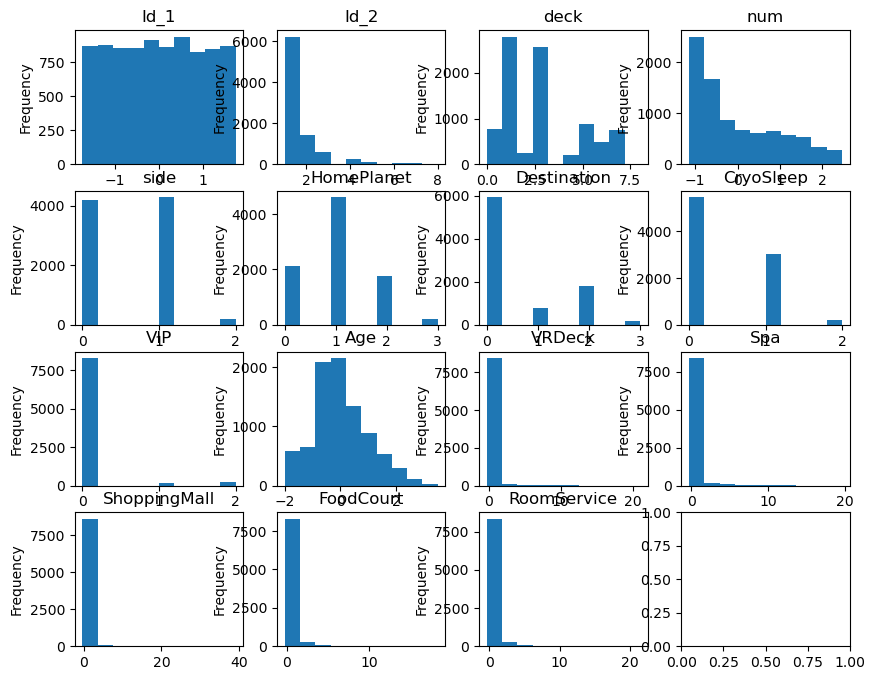

In [9]:
import matplotlib.pyplot as plt
#print(len(train.keys()))
fig, ax = plt.subplots(4,4)
keys=train_2.keys()
print(keys)
for i in range(len(train_2.keys())):
    plt.subplot(4, 4, i+1)
    train_2[keys[i]].plot.hist(figsize=(10, 8),)
    plt.title(keys[i])

In [10]:
#name
#i find the longest name
#i one hot encode the names in the following way: andrea morelli -> 
#1      2      3      4      5
#int(a) int(n) int(d) int(r) int(e)
#i run the NN without considering the name columns at first, 
#then i try with length of name, then i try with this encoding
m=0
#print(train["Name"])
new_col=[]
for name in train["Name"]:
    if type(name)==type(0.5):
        new_col.append("x y")
    else:
        new_col.append(name)
        if len(name)>=m:
            m=len(name)
print(m)
#print(new_col)
#i build three columns: length of name, length of surname, total length
l_name=[]
l_surname=[]
l_tot=[]
for name in new_col:
    splitted=name.split()
    l_name.append(len(splitted[0]))
    l_surname.append(len(splitted[1]))
    l_tot.append(len(name)-1)
#print(l_name)
train_2["Name"]=l_name#normalize(l_name)
train_2["Surname"]=l_name#normalize(l_surname)

18


Index(['Id_1', 'Id_2', 'deck', 'num', 'side', 'HomePlanet', 'Destination',
       'CryoSleep', 'VIP', 'Age', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt',
       'RoomService', 'Name', 'Surname'],
      dtype='object')


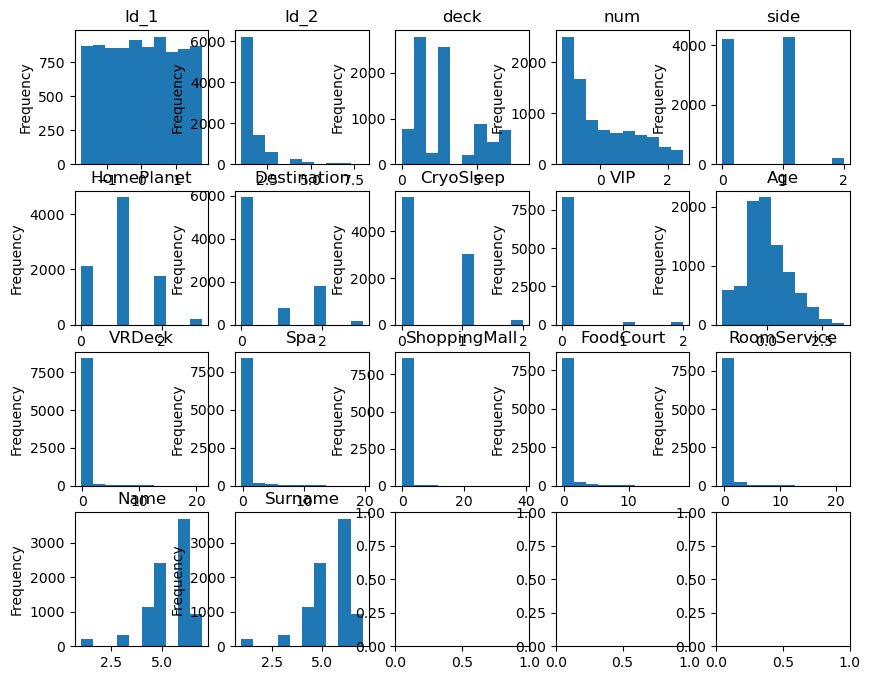

In [11]:
fig, ax = plt.subplots(4,5)
keys=train_2.keys()
print(keys)
for i in range(len(train_2.keys())):
    plt.subplot(4, 5, i+1)
    train_2[keys[i]].plot.hist(figsize=(10, 8),)
    plt.title(keys[i])

In [12]:
#name formatting, complex

In [13]:
print(len(train_2.keys()),len(train_2["Name"]))
keys=len(train_2.keys())
depth=len(train_2["Name"])

17 8693


In [14]:
Input=train_2.to_numpy()
Output=test_2.to_numpy()
print(Input.shape)
print(Output.shape)

(8693, 17)
(8693, 1)


In [15]:
print(train_2.iloc[:,4])
print(Input[:,4])
print(train_2.iloc[:,4]-Input[:,4])

0       0
1       1
2       1
3       1
4       1
       ..
8688    0
8689    1
8690    1
8691    1
8692    1
Name: side, Length: 8693, dtype: int64
[0. 1. 1. ... 1. 1. 1.]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8688    0.0
8689    0.0
8690    0.0
8691    0.0
8692    0.0
Name: side, Length: 8693, dtype: float64


In [16]:
#print(input_tensor[:2])
#input_tensor=np.zeros((depth,keys))
f=0.1
n_train=depth
n_val=int(n_train*f)
p=np.random.permutation(n_train)#way to make an index permutation before feeding to the NN
p_val=p[:n_val]
p_train=p[n_val:]
x_val=Input[p_val,:].astype('float32')
y_val=Output[p_val,:].astype('float32')
input_tensor=Input[p_train,:].astype('float32')
target_tensor=Output[p_train,:].astype('float32')
print(input_tensor.shape)
print(target_tensor.shape)
print(x_val.shape)
print(y_val.shape)

(7824, 17)
(7824, 1)
(869, 17)
(869, 1)


In [17]:
#np.count_nonzero(np.isnan(x_val))

In [18]:
from keras import models

from keras import layers
n_epochs=75
lr=0.0005
batch=1000

in_tensor=layers.Input(shape=(17,))

x=layers.Dense(32, activation='relu') (in_tensor)

x=layers.Dense(10, activation='relu') (x)

#x=layers.Dense(10, activation='relu') (x)

#x=layers.Dense(4, activation='relu') (x)

output_tensor=layers.Dense(1, activation='sigmoid' )(x)

model=models.Model(inputs=in_tensor, outputs=output_tensor)
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
#print(y_val)
history=model.fit(input_tensor, target_tensor, batch_size=batch, epochs=n_epochs, validation_data=(x_val,y_val), verbose=0)



['loss', 'accuracy', 'val_loss', 'val_accuracy']


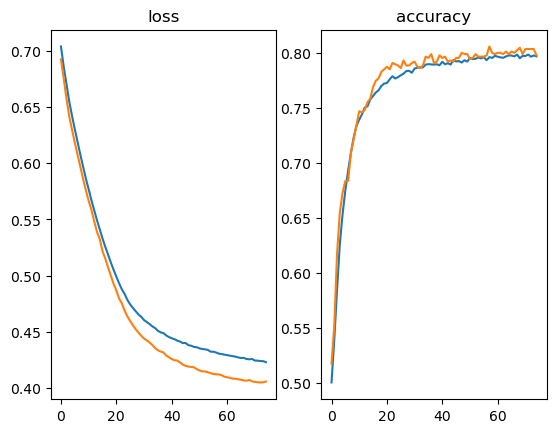

In [20]:
history_d=history.history
keys=list(history_d.keys())
print(keys)
epoch=range(0,n_epochs)
fig, ax = plt.subplots(1,2)
for i in range(2):
    plt.subplot(1,2, i+1)
    plt.plot(epoch,history_d[keys[i]])
    plt.plot(epoch,history_d[keys[i+2]])
    plt.title(keys[i])

In [21]:
#to test
#divide numbers in bins -> i have categories instead of coninuum values
#add k-validation


In [22]:
#good hyperparameters: batch_size=7000, 2 layer da 32 e 10, lr=0.0005, epochs=600. good fit at epoch 150 78% val

In [23]:
model.save('/kaggle/working/model')